In [ ]:
import numpy as np
import pandas as pd

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [ ]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Basic data information

In [ ]:
df.shape

(10127, 23)

In [ ]:
columns=df.columns
columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

# The fields information:
CLIENTNUM：Client number - Unique identifier for the customer holding the account  

Attrition_Flag：Flag indicative of account closure in next 6 months (between Jan to Jun 2013)

Customer_Age：Age of the account holder

Gender：Gender of the account holder

Dependent_count：Number of people financially dependent on the account holder

Education_Level：Educational qualification of account holder (ex - high school, college grad etc.)

Marital_Status：Marital status of account holder (Single, Married, Divorced, Unknown)

Income_Category：Annual income category of the account holder

Card_Category：Card type depicting the variants of the cards by value proposition (Blue, Silver and Platinum)

Months_on_book：Number of months since the account holder opened an an account with the lender

Total_Relationship_Count：Total number of products held by the customer. Total number of relationships the account holder has with the bank (example - retail bank, mortgage, wealth management etc.)

Months_Inactive_12_mon：Total number of months inactive in last 12 months

Contacts_Count_12_mon：Number of Contacts in the last 12 months. No. of times the account holder called to the call center in the past 12 months

Credit_Limit：Credit limit

Total_Revolving_Bal：Total amount as revolving balance

Avg_Open_To_Buy：Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1：Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt：Total Transaction Amount (Last 12 months)

Total_Trans_Ct：Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1：Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio：Average Card Utilization Ratio

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactivity

In [ ]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

# Statistics for different field types
### There are in total 6 string data types, 10 Numeric characters, and 7 Numeric characters with decimals.

In [ ]:
pd.value_counts(df.dtypes)

int64      10
float64     7
object      6
dtype: int64

In [ ]:
df.describe().style.background_gradient(cmap="ocean_r")

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,739177606.333663,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,36903783.450231,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,708082083.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,713036770.500000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,717926358.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,773143533.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,828343083.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


#Missing Data Values - NaN
#### Based on the statistics from the above, there is no missing value for each features

In [ ]:
total=df.isnull
total = df.isnull().sum().sort_values(ascending=False)

In [ ]:
total

CLIENTNUM                                                                                                                             0
Contacts_Count_12_mon                                                                                                                 0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0
Avg_Utilization_Ratio                                                                                                                 0
Total_Ct_Chng_Q4_Q1                                                                                                                   0
Total_Trans_Ct                                                                                                                        0
Total_Trans_Amt                                                                                                                       0
Total_Amt_Chng_Q4_Q1                            

# Delete unrelated features

In [ ]:
# remove the last two features as they are not useful
no_use = np.arange(21, df.shape[1])  
no_use

array([], dtype=int64)

In [ ]:
df.drop(df.columns[no_use],axis=1,inplace=True)

In [ ]:
#CLIENTNUM：Client number is unique identifier and it is not useful for building model
df.drop("CLIENTNUM", axis=1, inplace=True)

KeyError: ignored

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
#Review the descriptive statistical information of the data
df.describe().style.background_gradient(cmap="ocean_r")

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# EDA-Exploratory Data Analysis

In [ ]:
df_frequency = pd.concat([df['Customer_Age'],
                          df['Total_Trans_Ct'],
                          df['Total_Trans_Amt'],
                          df['Months_Inactive_12_mon'],
                          df['Credit_Limit'],
                          df['Attrition_Flag']],axis=1)
df_frequency

,Customer_Age,Total_Trans_Ct,Total_Trans_Amt,Months_Inactive_12_mon,Credit_Limit,Attrition_Flag
0,45,42,1144,1,12691.0,Existing Customer
1,49,33,1291,1,8256.0,Existing Customer
2,51,20,1887,1,3418.0,Existing Customer
3,40,20,1171,4,3313.0,Existing Customer
4,40,28,816,1,4716.0,Existing Customer
...,...,...,...,...,...,...
10122,50,117,15476,2,4003.0,Existing Customer
10123,41,69,8764,2,4277.0,Attrited Customer
10124,44,60,10291,3,5409.0,Attrited Customer
10125,30,62,8395,3,5281.0,Attrited Customer


In [ ]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

#### The results show that the number of existing customers and arrited customer is 8500 and 1627, respectively 

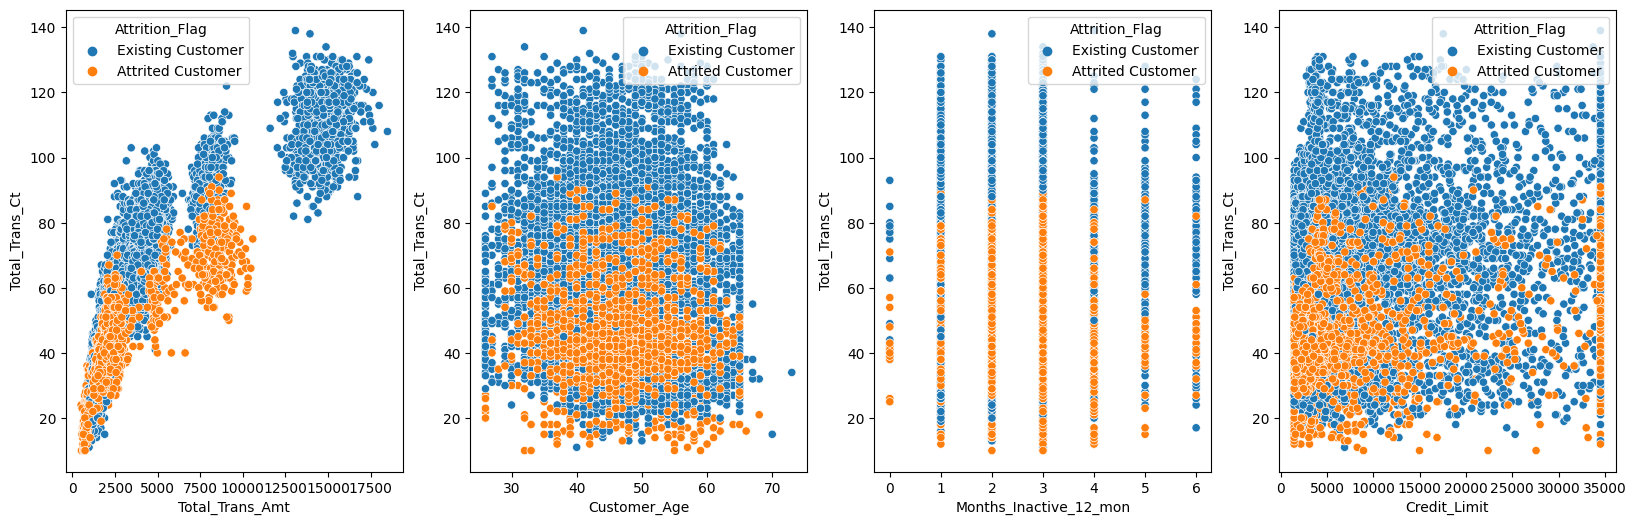

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,6))
sns.scatterplot(data=df_frequency,
                x="Total_Trans_Amt",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[0])

sns.scatterplot(data=df_frequency,
                x='Customer_Age',
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[1])

sns.scatterplot(data=df_frequency,
                x="Months_Inactive_12_mon",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[2])

sns.scatterplot(data=df_frequency,
                x='Credit_Limit',
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[3])
plt.show()

The following are our conclusions:

Figure 1: The higher the amount of money a user spends annually, the more likely they are to stay (not churn).

If there is no interaction for 2-3 months, there is a higher likelihood of user churn.
From Figure 2, it is observed that user age distribution is not a significant factor.

The higher a user's credit limit, the more likely they are to stay.

From Figure 4, it is observed that the majority of churned customers' credit card usage is less than 100 times.



In [ ]:
for col in ["Customer_Age","Total_Trans_Amt","Months_Inactive_12_mon","Credit_Limit"]:
  fig = px.scatter(df_frequency,
                      x=col,
                      y="Total_Trans_Ct",
                      color="Attrition_Flag")
  fig.show()

Based on user demographic information, which mainly includes age, gender, education level, status (single, married, etc.), income level, etc.

In [ ]:
df_demographic=df[['Customer_Age',
                   'Gender',
                   'Education_Level',
                   'Marital_Status',
                   'Income_Category',
                   'Attrition_Flag']]

df_demographic.head()


,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Attrition_Flag
0,45,M,High School,Married,$60K - $80K,Existing Customer
1,49,F,Graduate,Single,Less than $40K,Existing Customer
2,51,M,Graduate,Married,$80K - $120K,Existing Customer
3,40,F,High School,Unknown,Less than $40K,Existing Customer
4,40,M,Uneducated,Married,$60K - $80K,Existing Customer


In [ ]:
# The customer age distribution
px.violin(df_demographic,
          y="Customer_Age",
          color="Attrition_Flag")

From the violin plot above, it can be seen that the distribution of age is similar across different types of users.

Conclusion: Age is not a key factor in determining user churn.

In [ ]:
fig = make_subplots(rows=2, cols=1)

trace1=go.Box(x=df['Customer_Age'],name='Age With Box Plot',boxmean=True)
trace2=go.Histogram(x=df['Customer_Age'],name='Age With Histogram')

fig.add_trace(trace1, row=1,col=1)
fig.add_trace(trace2, row=2,col=1)

fig.update_layout(height=500, width=1000, title_text="Customer age distribution")
fig.show()

In [ ]:
flag_gender=df.groupby(["Attrition_Flag","Gender"]).size().reset_index().rename(columns={0:"number"})
flag_gender

,Attrition_Flag,Gender,number
0,Attrited Customer,F,930
1,Attrited Customer,M,697
2,Existing Customer,F,4428
3,Existing Customer,M,4072


In [ ]:
fig = px.bar(flag_gender,
             x="Attrition_Flag",
             y="number",
             color="Gender",
             barmode="group",
             text="number")

fig.show()

From the histogram above it can be seen that:

Women are higher than men in this data; women are also higher than men in two different types of customers

Data imbalance: Existing customers and lost customers are unbalanced, about 8400:1600

# Crosstab Statistical Analysis

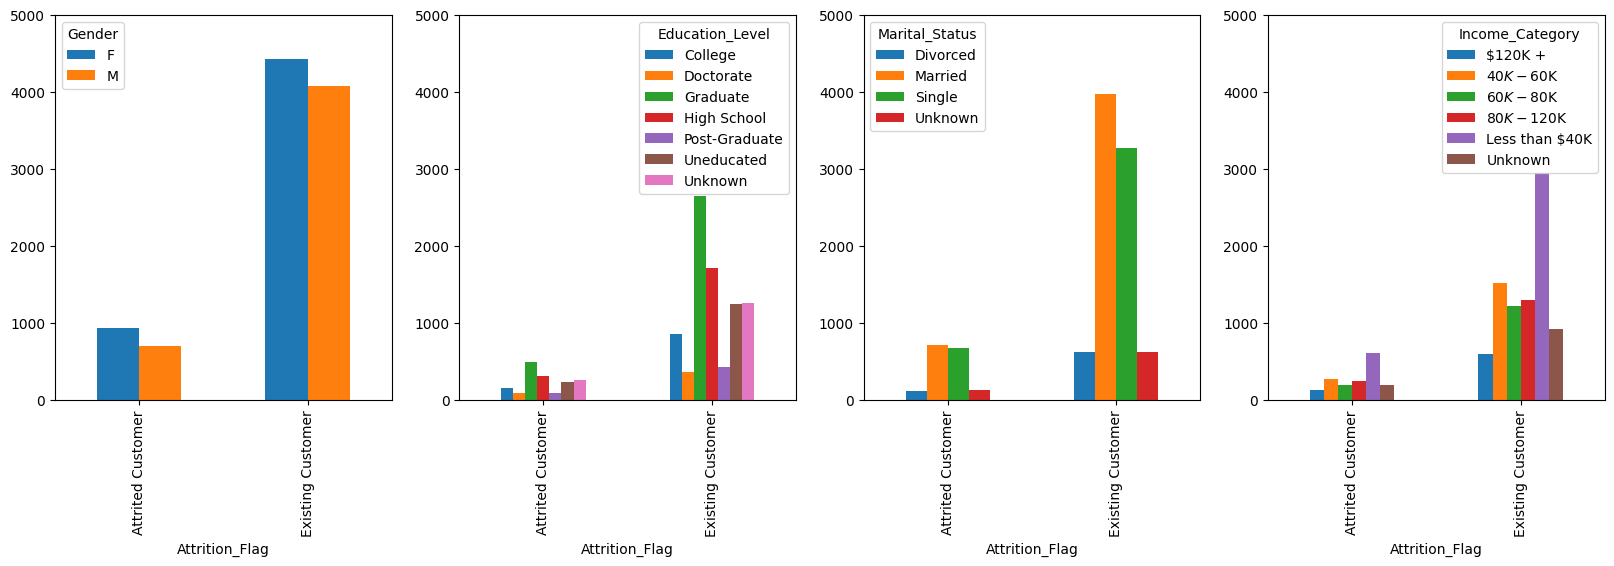

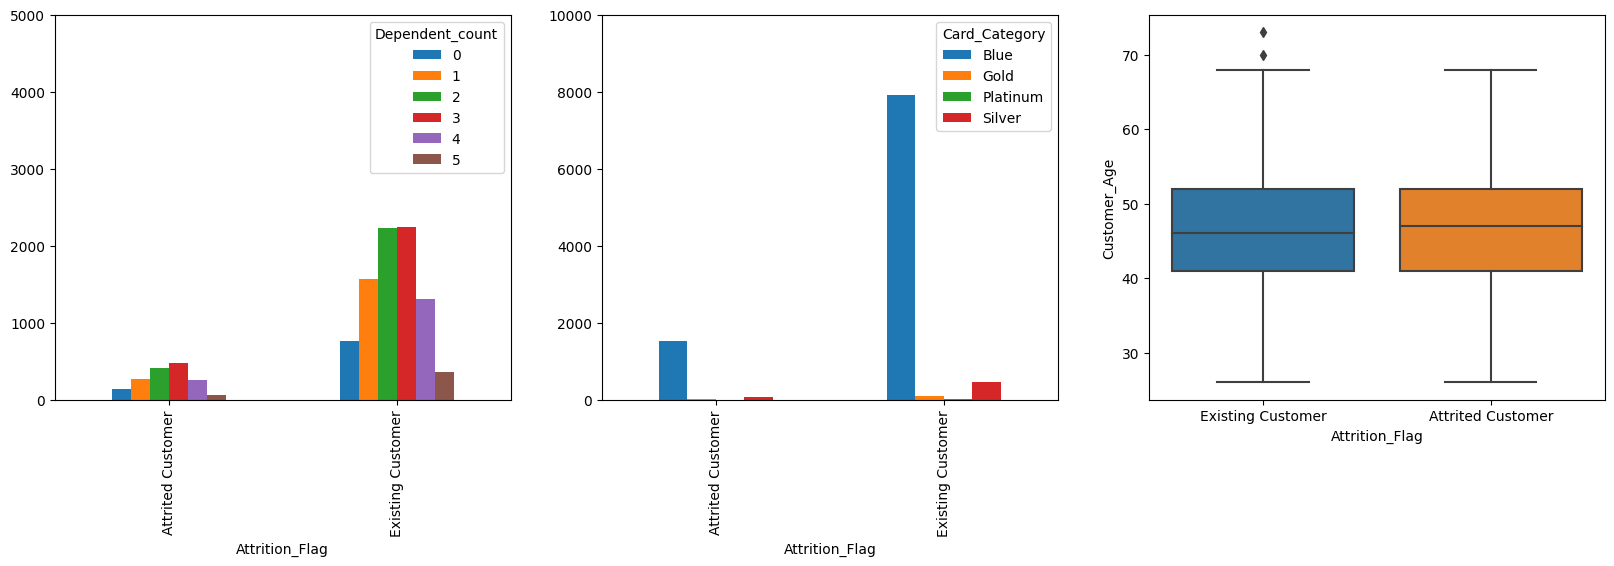

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(20,5))

pd.crosstab(df["Attrition_Flag"],df["Gender"]).plot(kind="bar", ax=ax1, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Education_Level"]).plot(kind="bar", ax=ax2, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Marital_Status"]).plot(kind="bar", ax=ax3, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Income_Category"]).plot(kind="bar", ax=ax4, ylim=[0,5000])

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Dependent_count']).plot(kind='bar',ax=ax1, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box = sns.boxplot(data=df_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)
plt.show()

It can be observed that the distribution of different levels of education and personal status is similar among the two types of customers. This conclusion is also verified: age is not a factor that affects existing or lost customers.

In [ ]:
churn = df["Attrition_Flag"].value_counts()
churn
churn.keys()

Index(['Existing Customer', 'Attrited Customer'], dtype='object')

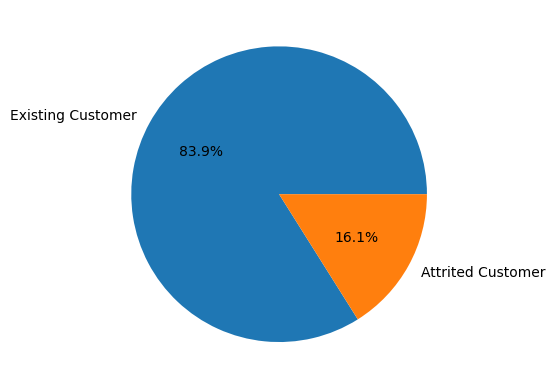

In [ ]:
plt.pie(x=churn, labels=churn.keys(),autopct="%.1f%%")
plt.show()

Existing customers still account for the vast majority
Later, the number of the two types of customers will be kept in balance through sampling.



In [ ]:
df_categorical=df.loc[:,df.dtypes==np.object_]
df_categorical.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [ ]:
df_number  =df.select_dtypes(exclude=['object'])
df_number.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df_number["Attrition_Flag"]=df.loc[:,"Attrition_Flag"]
df_number.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Existing Customer
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Existing Customer
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Existing Customer
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Existing Customer
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Existing Customer


In [ ]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame()

# 对分类型的字段进行类型编码
for i in df_categorical.columns:
    df_categorical_encoded[i] = label.fit_transform(df_categorical[i])

In [ ]:
from scipy.stats import chi2_contingency

# 定义计算克莱姆系数的函数
def cal_cramers_v(v1,v2):
    crosstab = np.array(pd.crosstab(v1,v2,rownames=None,colnames=None))
    stat = chi2_contingency(crosstab)[0]

    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1

    return stat / (obs * mini)


In [ ]:
rows = []
for v1 in df_categorical_encoded:
    col = []
    for v2 in df_categorical_encoded:
        # 计算克莱姆系数
        cramers = cal_cramers_v(df_categorical_encoded[v1],df_categorical_encoded[v2])
        col.append(round(cramers, 2))
    rows.append(col)

In [ ]:
cramers_results = np.array(rows)

cramerv_matrix = pd.DataFrame(cramers_results,
                              columns=df_categorical_encoded.columns,
                              index=df_categorical_encoded.columns)
cramerv_matrix.head()


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
Attrition_Flag,1.0,0.0,0.0,0.0,0.0,0.00
Gender,0.0,1.0,0.0,0.0,0.7,0.01
Education_Level,0.0,0.0,1.0,0.0,0.0,0.00
Marital_Status,0.0,0.0,0.0,1.0,0.0,0.00
Income_Category,0.0,0.7,0.0,0.0,1.0,0.00


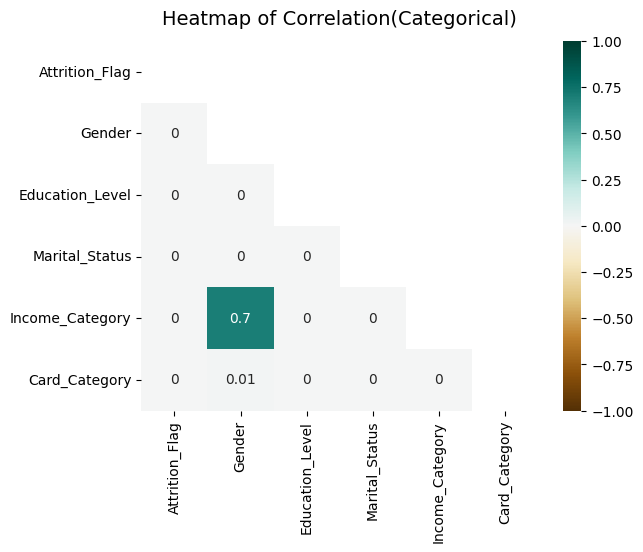

In [ ]:
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool_))
cat_heatmap = sns.heatmap(cramerv_matrix, # 系数矩阵
                          mask=mask,
                          vmin=-1,
                          vmax=1,
                          annot=True,
                          cmap="BrBG")

cat_heatmap.set_title("Heatmap of Correlation(Categorical)", fontdict={"fontsize": 14}, pad=12)

plt.show()

In [ ]:
df_number['Existing Customer'] = df_number['Attrition_Flag'].apply(lambda x: 1 if x=='Existing Customer' else 0)
df_number['Attrited Customer'] = df_number['Attrition_Flag'].apply(lambda x: 1 if x=='Attrited Customer' else 0)

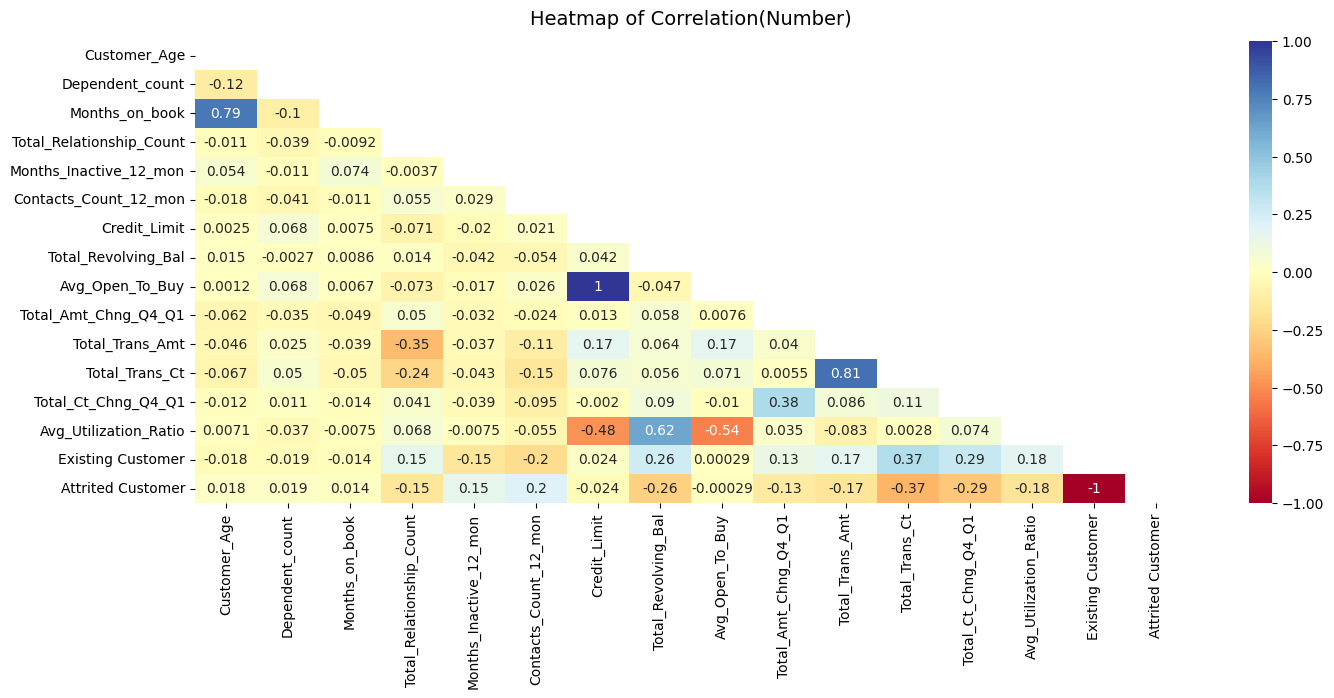

In [ ]:
from scipy import stats
num_corr = df_number.corr()  
plt.figure(figsize = (16,6))

mask = np.triu(np.ones_like(num_corr, dtype=np.bool_))
heatmap_number = sns.heatmap(num_corr, mask=mask,
                             vmin=-1, vmax=1,
                             annot=True, cmap="RdYlBu")

heatmap_number.set_title("Heatmap of Correlation(Number)", fontdict={"fontsize": 14}, pad=12)

plt.show()

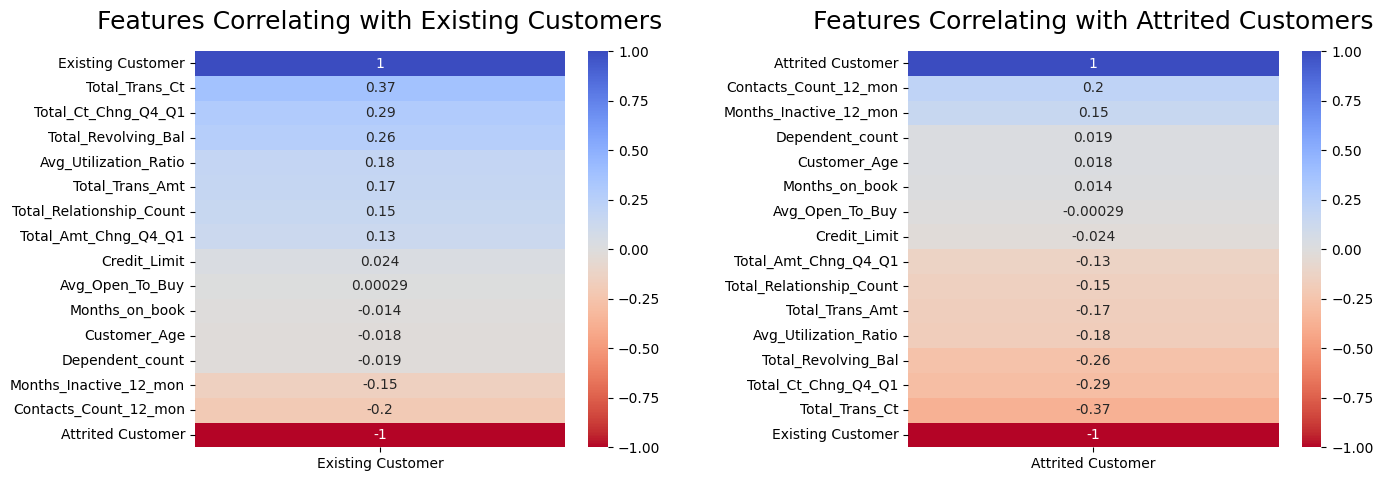

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

heatmap = sns.heatmap(num_corr[["Existing Customer"]].sort_values(by="Existing Customer", ascending=False),
                     ax=ax[0],
                     vmin=-1,
                     vmax=1,
                     annot=True,
                     cmap="coolwarm_r")
heatmap.set_title("Features Correlating with Existing Customers",fontdict={"fontsize":18}, pad=16);

heatmap = sns.heatmap(num_corr[["Attrited Customer"]].sort_values(by="Attrited Customer", ascending=False),
                     ax=ax[1],
                     vmin=-1,
                     vmax=1,
                     annot=True,
                     cmap="coolwarm_r")
heatmap.set_title("Features Correlating with Attrited Customers",fontdict={"fontsize":18}, pad=16);

fig.tight_layout(pad=5)

plt.show()

From the heatmap on the right side above, we can see that the following fields are not related to the lost type customers.
The value of the correlation coefficient is between 0 and 1 (right figure)

Credit Limit
Average Open To Buy
Months On Book
Age
Dependent Count

Now we will remove the above features

In [ ]:
df_model = df.copy()

df_model = df_model.drop(['Credit_Limit','Customer_Age','Avg_Open_To_Buy','Months_on_book','Dependent_count'],axis=1)

In [ ]:
df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [ ]:
df_model=pd.get_dummies(df_model)
df_model

,Attrition_Flag,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,5,1,3,777,1.335,1144,42,1.625,0.061,...,0,0,1,0,0,0,1,0,0,0
1,1,6,1,2,864,1.541,1291,33,3.714,0.105,...,0,0,0,0,1,0,1,0,0,0
2,1,4,1,0,0,2.594,1887,20,2.333,0.000,...,0,0,0,1,0,0,1,0,0,0
3,1,3,4,1,2517,1.405,1171,20,2.333,0.760,...,0,0,0,0,1,0,1,0,0,0
4,1,5,1,0,0,2.175,816,28,2.500,0.000,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,3,2,3,1851,0.703,15476,117,0.857,0.462,...,0,1,0,0,0,0,1,0,0,0
10123,0,4,2,3,2186,0.804,8764,69,0.683,0.511,...,0,1,0,0,0,0,1,0,0,0
10124,0,5,3,4,0,0.819,10291,60,0.818,0.000,...,0,0,0,0,1,0,1,0,0,0
10125,0,4,3,3,0,0.535,8395,62,0.722,0.000,...,0,1,0,0,0,0,1,0,0,0


# Modeling
#### The SMOTE(Synthetic Minority Oversampling Technique) is used to augment sample dataset to balance the Existing Customer and Attrited Customer

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df_model.loc[:, df_model.columns != "Attrition_Flag"]
y = df_model["Attrition_Flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
sm = SMOTE(sampling_strategy="minority", k_neighbors=20, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#### Now we use three different models to train the dataset

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
# Support Vector Machine
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_res, y_train_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
# Boosting tree
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100,  
                                learning_rate=1.0,  # learning rate
                                max_depth=1,   # depth of tree
                                random_state=42)

gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

# Model Prediction

In [ ]:
y_rf = rf.predict(X_test)
y_svm = svm.predict(X_test)
y_gb = gb.predict(X_test)

# Confusion Matrix

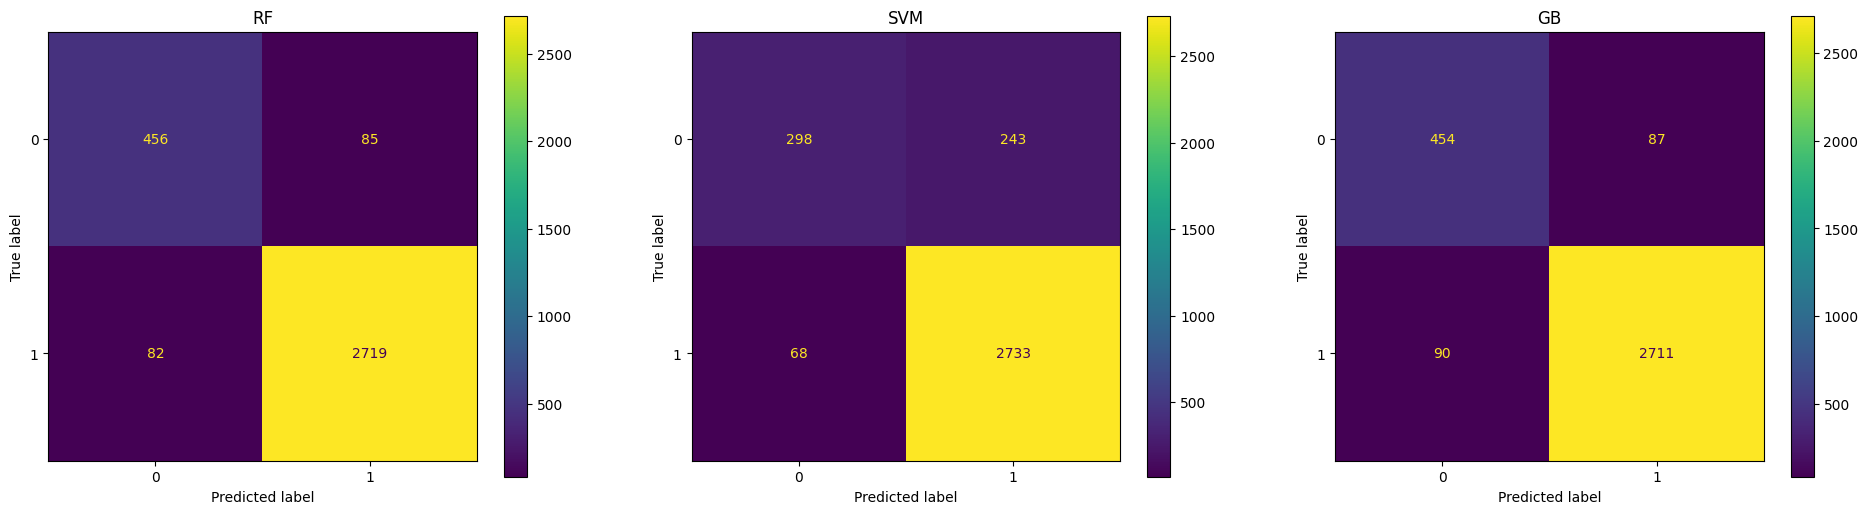

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax=plt.subplots(ncols=3, figsize=(20,6))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax[0])
ax[0].title.set_text('RF')

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, ax=ax[1])
ax[1].title.set_text('SVM')

ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test, ax=ax[2])
ax[2].title.set_text('GB')
fig.tight_layout(pad=5)

plt.show()

In [ ]:
# classification_report, recall_score, precision_score, f1_score

from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print('Random Forest Classifier')
print(classification_report(y_test, y_rf))

print('------------------------')
print('Support Vector Machine')
print(classification_report(y_test, y_svm))

print('------------------------')
print('Gradient Boosting')
print(classification_report(y_test, y_gb))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.91      0.91      0.91      3342
weighted avg       0.95      0.95      0.95      3342

------------------------
Support Vector Machine
              precision    recall  f1-score   support

           0       0.81      0.55      0.66       541
           1       0.92      0.98      0.95      2801

    accuracy                           0.91      3342
   macro avg       0.87      0.76      0.80      3342
weighted avg       0.90      0.91      0.90      3342

------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg

The performance of Model random forest and boosting tree is better than the support vector machine

# Parameter Optimization
Two different tuning optimization methods are used for random forest and boosted tree models:

Random Forest: Random Search Tuning

Gradient Boosting Trees: Grid Search Tuning

Random Search Tuning - Random Forest Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']

In [ ]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

In [ ]:
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(
    estimator = rf,  
    param_distributions=random_grid, 
    n_iter=30,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1)
rf_random.fit(X_train_res, y_train_res)
print(rf_random.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}


Now we use the optimized parameter to train the model agian

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Random Forest Classifier (Optimized)
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.91      0.91      0.91      3342
weighted avg       0.95      0.95      0.95      3342



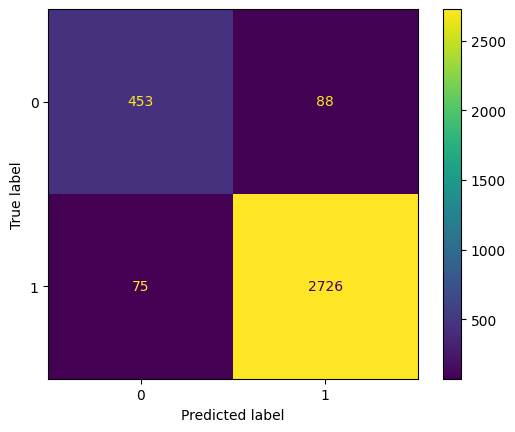

In [ ]:
rf_clf_search= RandomForestClassifier(n_estimators=14000,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   max_features='auto',
                                   max_depth=110,
                                   bootstrap=True)

rf_clf_search.fit(X_train_res,y_train_res)
y_rf_opt=rf_clf_search.predict(X_test)

print('Random Forest Classifier (Optimized)')

print(classification_report(y_test, y_rf_opt))

_rf_opt=ConfusionMatrixDisplay.from_estimator(rf_clf_search, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,100,10)}
param_test1

{'n_estimators': range(20, 100, 10)}

In [ ]:
grid_search1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=1.0,  # 待搜索模型
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=8,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10),
                        param_grid = param_test1, # 搜索参数
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)

grid_search1.fit(X_train_res,y_train_res)

grid_search1.best_params_

{'n_estimators': 90}

Gradient Boosting (Optimized)
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.91      0.91      0.91      3342
weighted avg       0.95      0.95      0.95      3342

0.8428835489833642


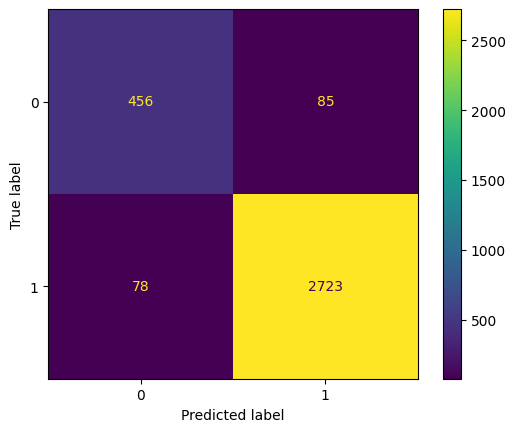

In [ ]:
gb_clf_opt=GradientBoostingClassifier(n_estimators=90,  
                                      learning_rate=1.0,
                                      min_samples_split=500,
                                      min_samples_leaf=50,
                                      max_depth=8,
                                      max_features='sqrt',
                                      subsample=0.8,
                                      random_state=10)

gb_clf_opt.fit(X_train_res,y_train_res)

y_gb_opt=gb_clf_opt.predict(X_test)
print('Gradient Boosting (Optimized)')
print(classification_report(y_test, y_gb_opt))

print(recall_score(y_test,y_gb_opt,pos_label=0))
_gbopt=ConfusionMatrixDisplay.from_estimator(gb_clf_opt, X_test, y_test)
_gbopt

"The number of categories in the upper left corner has increased from 454 to 456, which is also a certain improvement, but the effect is not very significant."
#### This notebook started from user-related data and completed the entire process of user churn prediction from data preprocessing, feature engineering and encoding, to model analysis and parameter tuning optimization. The overall model achieved an accuracy of 95% and a recall rate of 84.2%.